## **Project: Study On Panel Data Methodologies With Application To Macroeconometrics (Inflation Forecasting)**.

> ### **Title**: Merge of Dataset.


#### **Table of Contents:**
<ul>
<li><a href="#1">1. Delete countries with a large number of missing values.</a></li>
<li><a href="#2">2. Delete years with a large number of missing values.</a></li>
<li><a href="#3">3. Apply the interpolation to Missing Values.</a></li>
</ul>

**Import Library**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import glob
import math


sns.set(rc={'figure.figsize': [15,5]}, font_scale=1.2);
pd.set_option('future.no_silent_downcasting', True)


<a id=''></a>

### **Merge of Dataset:**

#### 1.1.  Meta Data Tables:
- > A. Table for `Countres` info: {'WEO_Country_Code', 'ISO', 'Country'} P_Key> 'WEO_Country_Code'.
- > B. Table for `Subject` info: {'WEO_Subject_Code', 'Subject_Descriptor', 'Subject_Notes', 'Units', 'Scale'} P_Key>'WEO_Subject_Code'.

- > C. Table for `Country_Subject_Notes` info: {'WEO_Country_Code', 'WEO_Subject_Code','Country_Series-specific_Notes','Estimates_Start_After'} P_Key>('WEO_Country_Code','WEO_Subject_Code').
- > D. Table for `Year` info: {'Years'} P_Key> 'Years'.

#### 1.2. dataset Tables:

- > E. Table for data values `WEO_Data_Countries` name Columns {'WEO_Country_Code' , 'Years' , and all Varibles 'WEO_Subject_Code' {'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGX_NGDP', 'GGXWDG_NGDP', 'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH', 'TM_RPCH', 'TRWMA', 'TX_RPCH'} }

----------------------------------------------

#### 2.1.  Meta Data Tables:
- > A. Table for `Country_Groups` info: {'WEO_Country_Group_Code', 'Country_Group_ID', 'Country_Group_Name'} P_Key> 'WEO_Country_Group_Code'.
- > B. Table for `Groups_Subject_Notes` info: {'Weo_Country_Group_Code', 'WEO_Subject_Code', 'Country_Series-Specific_Notes', 'Estimates_Start_After'} P_Key> ('Weo_Country_Group_Code', 'Weo_Subject_Code').

- > C. Table for `Country_Classes` info: {'Weo_Country_Code', 'Country', 'Weo_Country_Group_Code', and all Varibles 'Country_Group_ID' { 'All_Advanced_41','All_Advanced_Euro_20', 'All_Advanced_G7', 'All_Developing_155','All_Developing_Asia_30', 'All_Developing_Europe_15', 'All_Developing_Latina_Caribbean_33', 'All_Developing_Meast_Casia_32', 'All_Developing_Ssafrica_45', 'All_Asean_5', 'All_Brics_20', 'All_Eur_27'}}  P_Key> 'Weo_Country_Code'.

#### 2.2. dataset Tables:

- > D. Table for data values `Country_Data_Group`name Columns : {'WEO_Country_Group_Code' , 'Years' , and all Varibles 'WEO_Subject_Code' {'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGX_NGDP', 'GGXWDG_NGDP', 'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH', 'TM_RPCH', 'TRWMA', 'TX_RPCH'}}

-----------------------------------------------

#### 3. Final Dataset Table:

- > E. Table for data values `WEO_Data_Countries` name Columns {'WEO_Country_Code', 'Country', 'Advanced_Country', 'Years' , and all Varibles 'WEO_Subject_Code' {'BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGX_NGDP', 'GGXWDG_NGDP', 'LUR', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC', 'PPPSH', 'TM_RPCH', 'TRWMA', 'TX_RPCH'} }

**Path**

In [ ]:
# Use glob to get a list of all files with the .csv extension
folder_path = "../02-Dataset/02-DataBase"
files_list = glob.glob(folder_path + "/*.csv")
files_list

['../03-Dataset/02-DataBase\\01-Countries.csv',
 '../03-Dataset/02-DataBase\\02-Subject.csv',
 '../03-Dataset/02-DataBase\\03-Country_Subject_Notes.csv',
 '../03-Dataset/02-DataBase\\04-Years.csv',
 '../03-Dataset/02-DataBase\\05.1-WEO_Data_Countries.csv',
 '../03-Dataset/02-DataBase\\05.2-WEO_Data_Countries.csv',
 '../03-Dataset/02-DataBase\\06-Country_Groups.csv',
 '../03-Dataset/02-DataBase\\07-Group_Subject_Notes.csv',
 '../03-Dataset/02-DataBase\\08.1-Country_Classes.csv',
 '../03-Dataset/02-DataBase\\08.2-Country_Classes.csv',
 '../03-Dataset/02-DataBase\\08.3-Country_Classes.csv',
 '../03-Dataset/02-DataBase\\09.1-Country_Data_Group.csv',
 '../03-Dataset/02-DataBase\\09.2-Country_Data_Group.csv',
 '../03-Dataset/02-DataBase\\10-WEO_Data.csv',
 '../03-Dataset/02-DataBase\\10-WEO_Data_DB.csv']

**Load Dataset**

In [85]:
df = pd.read_csv(folder_path+"/10-WEO_Data.csv")
display(df.head())

,WEO_Country_Code,Country,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
0,111,United States,1,1980,0.081,NaN,NaN,NaN,NaN,7.175,-0.257,22.059,23.310,13.502,1.0,12552.943,21.579,-6.664,NaN,10.778
1,111,United States,1,1981,0.157,NaN,NaN,NaN,NaN,7.617,2.537,23.206,24.277,10.378,1.0,13948.701,21.683,2.616,NaN,1.213
2,111,United States,1,1982,-0.165,NaN,NaN,NaN,NaN,9.708,-1.803,21.713,22.071,6.158,1.0,14404.994,21.185,-1.264,NaN,-7.662
3,111,United States,1,1983,-1.065,NaN,NaN,NaN,NaN,9.600,4.584,19.725,22.253,3.160,1.0,15513.679,21.607,12.609,NaN,-2.589
4,111,United States,1,1984,-2.337,NaN,NaN,NaN,NaN,7.508,7.236,21.839,25.096,4.368,1.0,17086.441,22.177,24.344,NaN,8.150


In [86]:
df.isna().sum()

WEO_Country_Code       0
Country                0
Advanced_Country       0
Year                   0
BCA_NGDPD           1182
GGR_NGDP            2327
GGSB_NPGDP          6304
GGXWDG_NGDP         3049
GGX_NGDP            2380
LUR                 4681
NGDP_RPCH            859
NGSD_NGDP           1859
NID_NGDP            1852
PCPIPCH              906
PPPEX                946
PPPPC                901
PPPSH                967
TM_RPCH             1907
TRWMA               5132
TX_RPCH             1863
dtype: int64

<a id='1'></a>

### **1. Delete countries with a large number of missing values:**

In [90]:
# List to store names of countries that meet the conditions
valid_countries = []

# Loop through each unique country to check the conditions
for country in df['Country'].unique():
    # Filter the data for the current country
    df_country = df[df['Country'] == country]
    
    # Drop columns that are not actual data variables
    data_only = df_country.drop(columns=['WEO_Country_Code', 'Country', 'Advanced_Country'])
    
    # Calculate the overall missing value ratio
    overall_missing_ratio = data_only.isnull().mean().mean()
    
    # Calculate the maximum missing ratio for any single variable
    max_missing_per_variable = data_only.isnull().mean().max()
    
    # If the country meets the criteria, add it to the list
    if overall_missing_ratio <= 0.5 and max_missing_per_variable <= 0.7:
        valid_countries.append(country)

# Create a new DataFrame containing only the accepted countries
filtered_df = df[df['Country'].isin(valid_countries)].copy()

# Display a summary of the new filtered data
print(f"Number of countries selected: {len(valid_countries)}")
print("Selected countries:", valid_countries)


Number of countries selected: 70
Selected countries: ['United States', 'United Kingdom', 'Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Italy', 'Netherlands', 'Norway', 'Sweden', 'Switzerland', 'Canada', 'Japan', 'Finland', 'Greece', 'Iceland', 'Ireland', 'Malta', 'Portugal', 'Spain', 'Türkiye', 'Australia', 'New Zealand', 'South Africa', 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Mexico', 'Panama', 'Paraguay', 'Peru', 'Barbados', 'Suriname', 'Cyprus', 'Jordan', 'Egypt', 'Hong Kong SAR', 'Indonesia', 'Korea', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Mauritius', 'Morocco', 'Tunisia', 'Belarus', 'Georgia', 'Kazakhstan', 'Bulgaria', 'Russia', 'Ukraine', 'Czech Republic', 'Slovak Republic', 'Estonia', 'Latvia', 'Serbia', 'Hungary', 'Lithuania', 'Croatia', 'Slovenia', 'Bosnia and Herzegovina', 'Poland', 'Romania']


<a id='2'></a>

### **2. Delete years with a large number of missing values:**

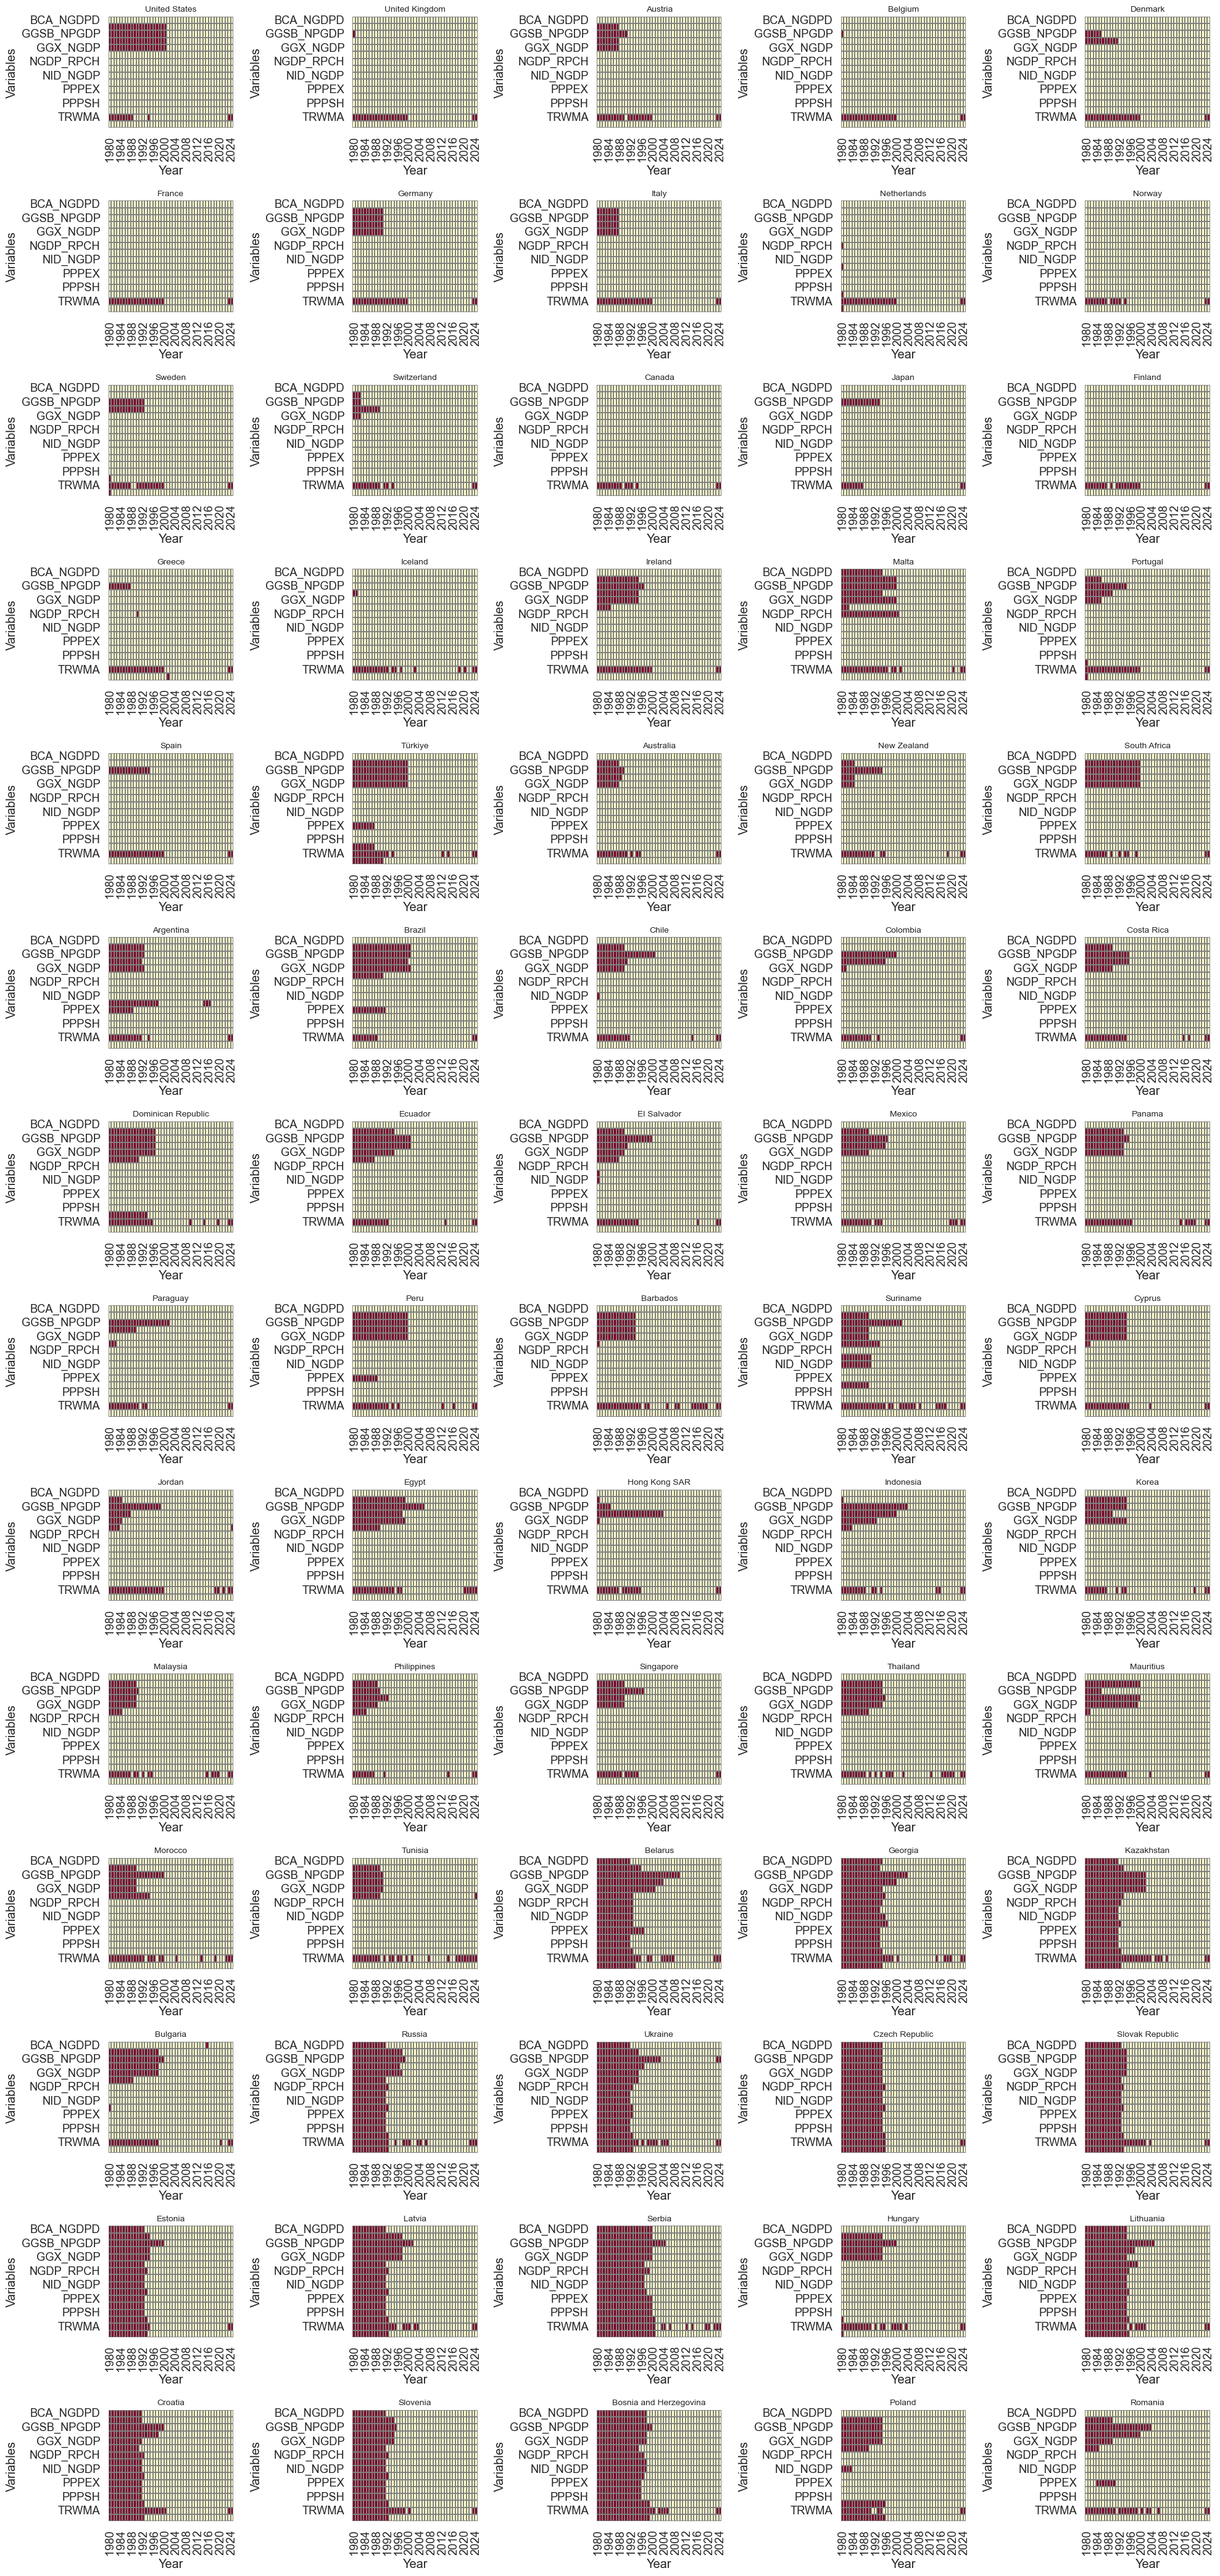

In [91]:
# Get the list of valid countries from the filtered DataFrame
countries = filtered_df['Country'].unique()

# Set the number of columns in the subplot grid
cols = 5
rows = math.ceil(len(countries) / cols)  # Calculate number of required rows

# Create a figure and axes for subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
axes = axes.flatten()  # Flatten to easily index axes

for idx, country in enumerate(countries):
    # Filter the DataFrame for the current country
    df_country = filtered_df[filtered_df['Country'] == country]

    # Drop non-data columns
    data_only = df_country.drop(columns=['WEO_Country_Code', 'Country', 'Advanced_Country'])

    # Group by 'Year' and calculate missing value ratios for each variable
    missing_by_year = data_only.groupby(df_country['Year']) \
                               .apply(lambda x: x.drop(columns=['Year'], errors='ignore').isnull().mean())

    # Transpose for heatmap format
    missing_by_year = missing_by_year.T

    # Plot in the current subplot axis
    ax = axes[idx]
    sns.heatmap(
        missing_by_year,
        cmap='YlOrRd',
        linewidths=0.3,
        linecolor='gray',
        cbar=False,  # Hide color bar in each subplot to avoid clutter
        ax=ax
    )

    ax.set_title(country, fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel('Variables')

# Remove any unused axes
for j in range(len(countries), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [107]:
filtered_df2 = filtered_df[filtered_df.Year.isin(np.arange(2000,2025))]
print(filtered_df2.shape)
filtered_df2.head()

(1750, 20)


,WEO_Country_Code,Country,Advanced_Country,Year,BCA_NGDPD,GGR_NGDP,GGSB_NPGDP,GGXWDG_NGDP,GGX_NGDP,LUR,NGDP_RPCH,NGSD_NGDP,NID_NGDP,PCPIPCH,PPPEX,PPPPC,PPPSH,TM_RPCH,TRWMA,TX_RPCH
20,111,United States,1,2000,-3.921,NaN,NaN,NaN,NaN,3.967,4.078,20.741,23.678,3.367,1.0,36312.782,20.502,13.000,2.10,8.312
21,111,United States,1,2001,-3.724,32.257,-1.441,53.146,32.801,4.742,0.956,19.581,22.177,2.817,1.0,37101.453,20.207,-2.462,2.11,-5.580
22,111,United States,1,2002,-4.173,29.877,-3.598,55.538,33.698,5.783,1.700,18.303,21.723,1.596,1.0,37945.761,20.007,3.669,2.16,-1.954
23,111,United States,1,2003,-4.559,29.266,-4.480,58.625,34.037,5.992,2.796,17.351,21.746,2.298,1.0,39405.354,19.846,5.123,1.96,2.105
24,111,United States,1,2004,-5.205,29.476,-4.375,66.105,33.719,5.542,3.848,17.662,22.652,2.668,1.0,41641.617,19.604,10.984,1.79,9.644


In [108]:
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1750 entries, 20 to 8774
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WEO_Country_Code  1750 non-null   int64  
 1   Country           1750 non-null   object 
 2   Advanced_Country  1750 non-null   int64  
 3   Year              1750 non-null   int64  
 4   BCA_NGDPD         1749 non-null   float64
 5   GGR_NGDP          1748 non-null   float64
 6   GGSB_NPGDP        1695 non-null   float64
 7   GGXWDG_NGDP       1738 non-null   float64
 8   GGX_NGDP          1745 non-null   float64
 9   LUR               1748 non-null   float64
 10  NGDP_RPCH         1749 non-null   float64
 11  NGSD_NGDP         1750 non-null   float64
 12  NID_NGDP          1750 non-null   float64
 13  PCPIPCH           1747 non-null   float64
 14  PPPEX             1750 non-null   float64
 15  PPPPC             1750 non-null   float64
 16  PPPSH             1750 non-null   float64
 17 

In [109]:
filtered_df2.isna().sum()

WEO_Country_Code      0
Country               0
Advanced_Country      0
Year                  0
BCA_NGDPD             1
GGR_NGDP              2
GGSB_NPGDP           55
GGXWDG_NGDP          12
GGX_NGDP              5
LUR                   2
NGDP_RPCH             1
NGSD_NGDP             0
NID_NGDP              0
PCPIPCH               3
PPPEX                 0
PPPPC                 0
PPPSH                 0
TM_RPCH               1
TRWMA               283
TX_RPCH               2
dtype: int64

<a id='3'></a>

### **3. Apply the interpolation to Missing Values:**

In [111]:
# columns that missing values
cols_with_na = filtered_df2.columns[filtered_df2.isnull().any()].tolist()
cols_with_na

['BCA_NGDPD',
 'GGR_NGDP',
 'GGSB_NPGDP',
 'GGXWDG_NGDP',
 'GGX_NGDP',
 'LUR',
 'NGDP_RPCH',
 'PCPIPCH',
 'TM_RPCH',
 'TRWMA',
 'TX_RPCH']

In [ ]:
# Sort the data by Country and Year (panel structure)
df_panel = filtered_df2.sort_values(by=['Country', 'Year']).copy()

# Drop non-numeric and identifier columns
df_numeric = df_panel.drop(columns=['WEO_Country_Code', 'Country', 'Advanced_Country', 'Year'])

# Select numeric columns
data_columns = df_numeric.columns
data_columns

Index(['BCA_NGDPD', 'GGR_NGDP', 'GGSB_NPGDP', 'GGXWDG_NGDP', 'GGX_NGDP', 'LUR',
       'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPIPCH', 'PPPEX', 'PPPPC',
       'PPPSH', 'TM_RPCH', 'TRWMA', 'TX_RPCH'],
      dtype='object')

In [113]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Copy 
df_panel_b = df_panel.copy()

# Handle missing values for each country 
def handle_missing_country(country):
    imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=20, random_state=0, verbose=2)
    country[cols_with_na] = imputer.fit_transform(country[cols_with_na])
    return country

# Apply
df_interpolated = df_panel_b.groupby('Country', group_keys=False).apply(handle_missing_country)

[IterativeImputer] Completing matrix with shape (25, 11)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.04
[IterativeImputer] Change: 19.279336712635512, scaled tolerance: 0.22982400000000003 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.10
[IterativeImputer] Change: 0.3267295232172476, scaled tolerance: 0.22982400000000003 
[IterativeImputer] Ending imputation round 3/20, elapsed time 0.15
[IterativeImputer] Change: 0.006211766145141517, scaled tolerance: 0.22982400000000003 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25, 11)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.03
[IterativeImputer] Change: 2.2463718953984118, scaled tolerance: 0.056999 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.05
[IterativeImputer] Change: 0.0, scaled tolerance: 0.056999 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (2

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Ending imputation round 2/20, elapsed time 0.06
[IterativeImputer] Change: 0.0, scaled tolerance: 0.052876 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25, 11)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.04
[IterativeImputer] Change: 0.9902816077053773, scaled tolerance: 0.046518000000000004 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.07
[IterativeImputer] Change: 0.0009593164737791149, scaled tolerance: 0.046518000000000004 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (25, 11)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.03
[IterativeImputer] Change: 1.7807323513935984, scaled tolerance: 0.046276000000000005 
[IterativeImputer] Ending imputation round 2/20, elapsed time 0.05
[IterativeImputer] Change: 0.00016348234780583226, scaled tolerance: 0.046276000000000005 
[IterativeImputer] Early stopp

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_23996\1897214877.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_interpolated = df_panel_b.groupby('Country', group_keys=False).apply(handle_missing_country)


In [114]:
df_interpolated.isna().sum()

WEO_Country_Code    0
Country             0
Advanced_Country    0
Year                0
BCA_NGDPD           0
GGR_NGDP            0
GGSB_NPGDP          0
GGXWDG_NGDP         0
GGX_NGDP            0
LUR                 0
NGDP_RPCH           0
NGSD_NGDP           0
NID_NGDP            0
PCPIPCH             0
PPPEX               0
PPPPC               0
PPPSH               0
TM_RPCH             0
TRWMA               0
TX_RPCH             0
dtype: int64

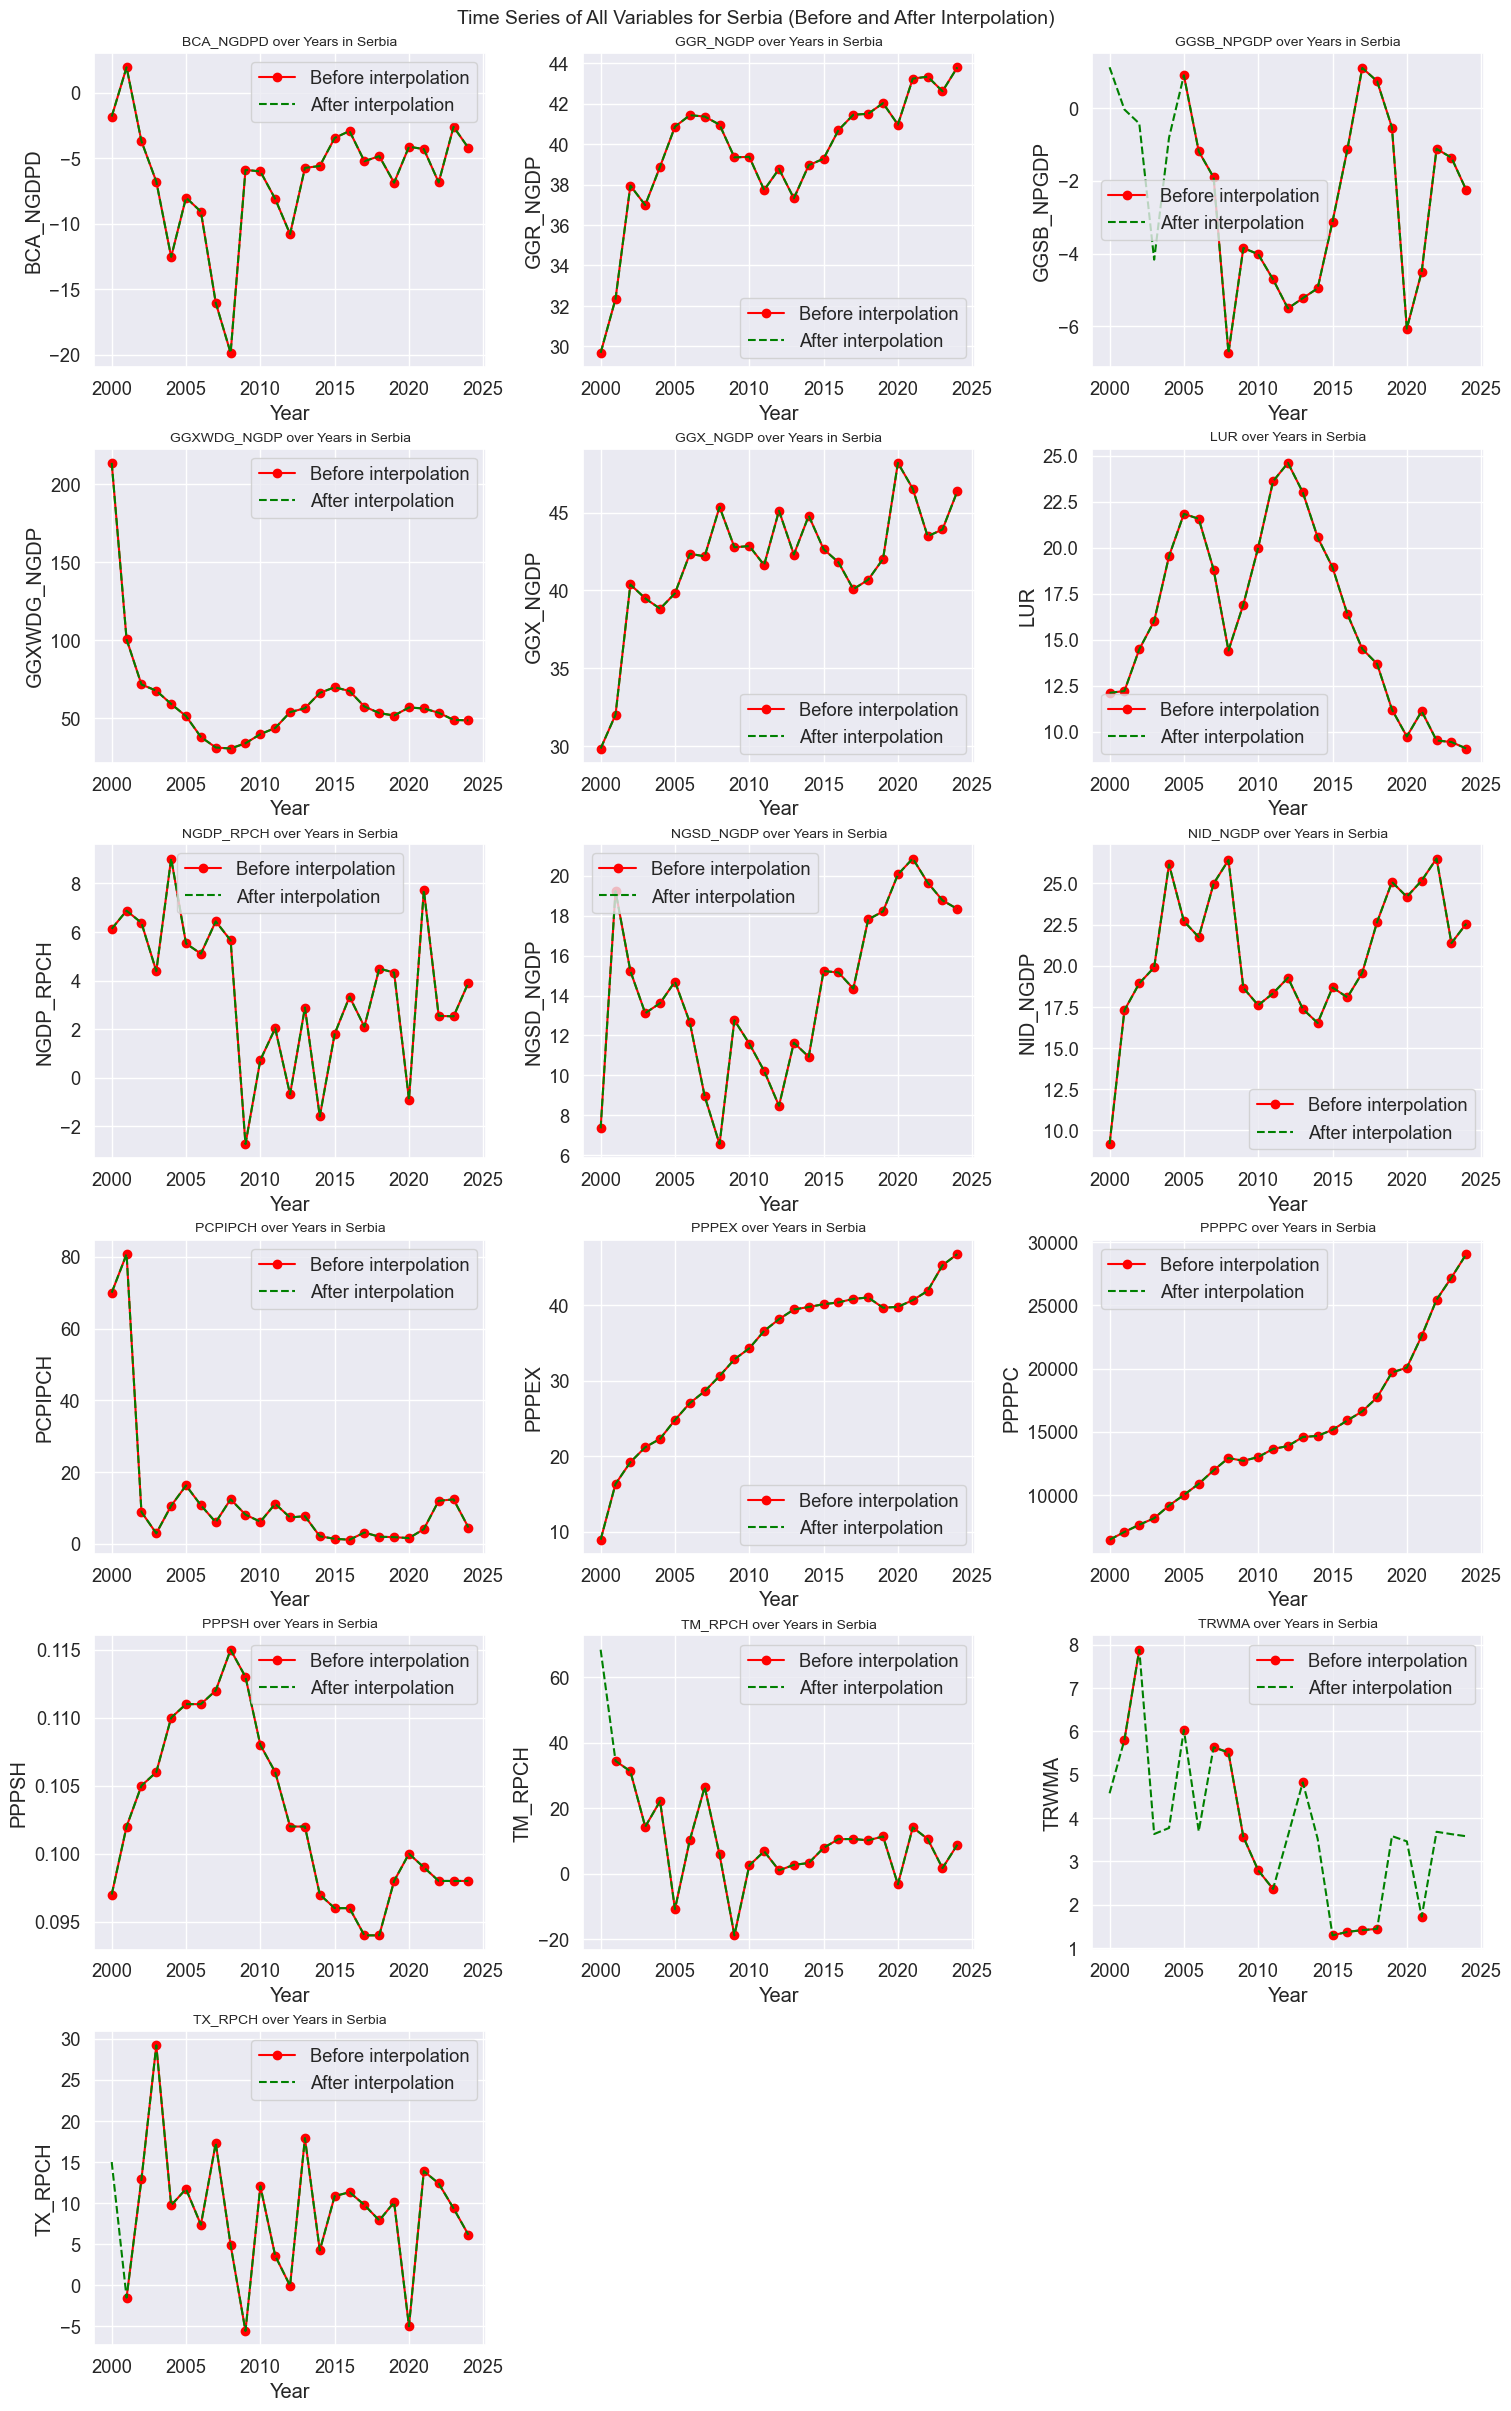

In [115]:
# Select the country
country_name = 'Serbia'#'Belarus'  # Change this as needed

# Columns to interpolate (already defined earlier)
# data_columns = [col for col in filtered_df2.columns if col not in ['WEO_Country_Code', 'Country', 'Advanced_Country', 'Year']]

# Filter data before and after interpolation
before = filtered_df2[filtered_df2['Country'] == country_name]
after = df_interpolated[df_interpolated['Country'] == country_name]

# Create subplots
n_cols = 3
n_rows = (len(data_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)

for i, col in enumerate(data_columns):
    row, col_idx = divmod(i, n_cols)
    ax = axes[row, col_idx]

    ax.plot(before['Year'], before[col], 'o-', label='Before interpolation', color='red')
    ax.plot(after['Year'], after[col], '--', label='After interpolation', color='green')

    ax.set_title(f'{col} over Years in {country_name}', fontsize=10)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(len(data_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Main title
plt.suptitle(f'Time Series of All Variables for {country_name} (Before and After Interpolation)', fontsize=14)
plt.show()


In [116]:
df_interpolated.to_csv(folder_path+"/../01-Data_Clean.csv",index=False)

# **END**